In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [43]:
df = pd.read_csv('/content/iris_Petal.csv')
data = df.values
X = data[:,:-1]
y = data[:,-1].reshape(-1,1)
X = np.hstack((np.ones((X.shape[0],1)),X))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state = 42)

In [44]:
def predict(X,w):
  y = np.dot(X,w)
  return sigmoid(y)

def sigmoid(x):
  return 1/(1+np.exp(-x))

def f_loss(y_pred,y):
  return np.sum(-(y*np.log(y_pred) + (1-y)*np.log(1-y_pred)))

def derivative(X,y_pred,y):
  return np.dot(X.T,(y_pred - y))

def accuracy(y_pred,y):
  N = 0
  for i,j in zip(y_pred,y):
    if i == j:
      N+=1
  return N/y.shape[0]

In [45]:
w = np.array([[0.1]*X.shape[1]]).reshape(-1,1)
epochs = 10000
lr = 0.001
losses = []
for _ in tqdm(range(epochs)):
  y_pred = predict(X_train,w)

  loss = f_loss(y_pred,y_train)

  losses.append(loss)
  w = w - lr*derivative(X_train,y_pred,y_train)


100%|██████████| 10000/10000 [00:00<00:00, 32143.88it/s]


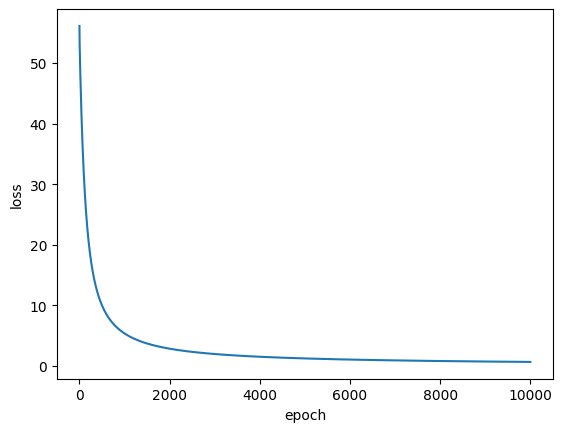

In [46]:
plt.plot(range(epochs),losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [47]:
y_pred1 = predict(X_train,w)
y_pred1 = np.round(y_pred1).astype(int)
print(accuracy(y_pred1,y_train))

1.0


In [48]:
y_pred2 = predict(X_test,w)
y_pred2 = np.round(y_pred2).astype(int)
print(accuracy(y_pred2,y_test))

1.0
